In [ ]:
!pip install finance-datareader

In [ ]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
ks = fdr.DataReader("KS11",start="2010-01-01",end="2021-06-03")

In [ ]:
er = pd.read_csv("/content/drive/MyDrive/Dataset/DEXKOUS.csv")

In [ ]:
def str_to_float(x):
  
  try:
    return float(x)
  
  except:
    return np.NaN

In [ ]:
ks_pct = ks.pct_change(periods=365)["Close"]
er = pd.DataFrame(index=er.DATE,columns=["ER"],data=map(lambda x : str_to_float(x),er.DEXKOUS.tolist()))
er.fillna(method="ffill",inplace=True)

In [ ]:
er_pct = er.pct_change(periods=365)["ER"]
er_pct.index = pd.to_datetime(er_pct.index)

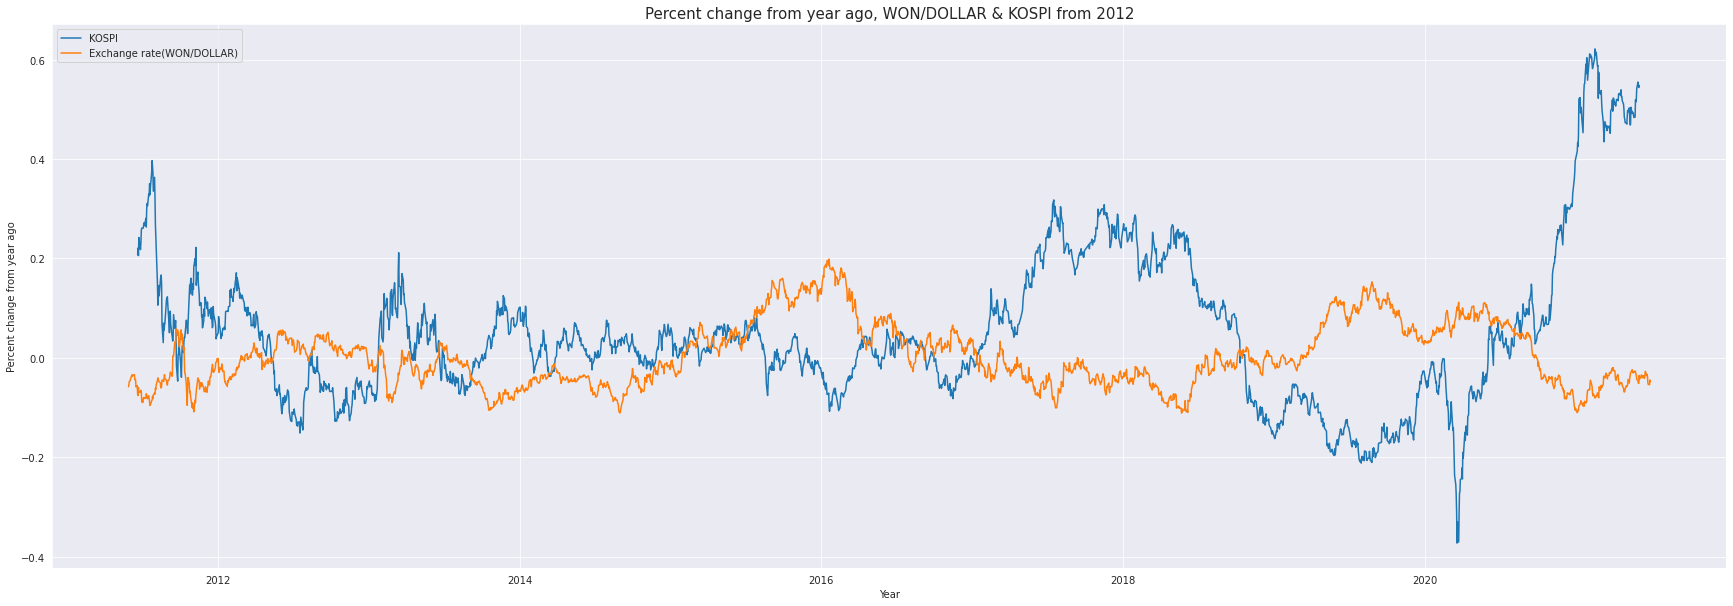

In [ ]:
sns.set_style("darkgrid")
fig = plt.figure(figsize=(30,10))
ax = fig.subplots(1,1)
ax.plot(ks_pct,label="KOSPI")
ax.plot(er_pct,label="Exchange rate(WON/DOLLAR)")
ax.set_title("Percent change from year ago, WON/DOLLAR & KOSPI from 2012",fontsize=15)
ax.set_ylabel("Percent change from year ago")
ax.set_xlabel("Year")
plt.legend()